<a href="https://colab.research.google.com/github/DARWICHAli/notebooks/blob/main/naiades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sciences des données appliquées


DARWICH Ali (SDSC)

QADADRI HAYTAM (SDIA)

Yassine Maliki (SDSC

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Obtention des données

In [ ]:
analyse = pd.read_csv('Analyses.CSV',sep=";",on_bad_lines='skip')

#analyse = pd.read_csv('/content/drive/MyDrive/naiades/Analyses.CSV',sep=";",on_bad_lines='skip')


#conditionsEnv = pd.read_csv('/content/drive/MyDrive/naiades/ConditionsEnvironnementales.CSV',sep=";", on_bad_lines='skip')
#Station = pd.read_csv('/content/drive/MyDrive/naiades/Stations.CSV',sep=";", on_bad_lines='skip')
#Operation = pd.read_csv('/content/drive/MyDrive/naiades/Operations.CSV',sep=";", on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2 Compréhension et vérification des données
• Examiner la composition des fichiers et les métadonnées

• Vérifier la cohérence des données, en particulier, pour un paramètre, est-ce que les valeurs mesurées l’ont été dans le même contexte et avec la même unité ?

• Que faire des mesures sous les seuils de quantification ?

2.1 Examiner la composition des fichiers et les métadonnées

In [ ]:
display(analyse.info())
display(analyse.head())
display(analyse.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336439 entries, 0 to 336438
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CdStationMesureEauxSurface  336439 non-null  int64  
 1   LbStationMesureEauxSurface  336439 non-null  object 
 2   CdSupport                   336439 non-null  int64  
 3   LbSupport                   336439 non-null  object 
 4   CdFractionAnalysee          336439 non-null  int64  
 5   LbFractionAnalysee          336439 non-null  object 
 6   CdPrelevement               336439 non-null  int64  
 7   DatePrel                    336439 non-null  object 
 8   HeurePrel                   333618 non-null  object 
 9   DateAna                     323732 non-null  object 
 10  HeureAna                    323629 non-null  object 
 11  CdParametre                 336439 non-null  int64  
 12  LbLongParamètre             336439 non-null  object 
 13  RsAna         

None

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,CdSupport,LbSupport,CdFractionAnalysee,LbFractionAnalysee,CdPrelevement,DatePrel,HeurePrel,DateAna,...,CommentairesAna,ComResultatAna,CdRdd,NomRdd,CdProducteur,NomProducteur,CdPreleveur,NomPreleveur,CdLaboratoire,NomLaboratoire
0,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
1,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
2,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
3,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR
4,2001046,LE MUHLBACH DE SCHOENAU À SCHOENAU,3,Eau,23,Eau brute,4548590,2016-11-28,10:05:00,2016-11-28,...,NaN,NaN,0200000007,Réseau d'Intérêt Départemental de suivi de la ...,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,2.267000e+13,CONSEIL DÉPARTEMENTAL DU BAS-RHIN,4.452360e+13,CENTRE D'ANALYSES ET DE RECHERCHES - CAR


,CdStationMesureEauxSurface,CdSupport,CdFractionAnalysee,CdPrelevement,CdParametre,RsAna,CdUniteMesure,CdRqAna,CdInsituAna,ProfondeurPrel,...,CdMethode,RdtExtraction,CdMethodeExtraction,CdAccreAna,AgreAna,CdStatutAna,CdQualAna,CdProducteur,CdPreleveur,CdLaboratoire
count,3.364390e+05,336439.000000,336439.000000,3.364390e+05,336439.000000,336439.000000,336439.000000,336439.000000,336439.000000,0.0,...,336438.000000,213842.000000,102931.000000,336438.000000,0.0,336438.0,336438.00000,3.364380e+05,2.689060e+05,3.256510e+05
mean,2.032494e+06,3.069849,21.752184,6.080034e+06,2099.238754,16.549331,123.472038,6.764335,1.738984,NaN,...,373.206121,98.902741,711.722979,1.303465,NaN,2.0,1.00003,1.934977e+13,4.516105e+13,3.876275e+13
std,1.513954e+04,0.465129,5.533160,2.017948e+05,1577.509743,609.994172,62.035336,4.318740,0.490521,NaN,...,142.147842,6.533496,0.714175,0.535643,NaN,0.0,0.00771,2.474530e+12,8.423965e+12,1.058086e+13
min,2.001046e+06,3.000000,3.000000,4.548248e+06,1082.000000,-0.200000,27.000000,1.000000,0.000000,NaN,...,0.000000,60.000000,711.000000,0.000000,NaN,2.0,1.00000,0.000000e+00,2.267000e+13,2.267000e+13
25%,2.028000e+06,3.000000,23.000000,6.002560e+06,1301.000000,0.010000,133.000000,1.000000,2.000000,NaN,...,275.000000,100.000000,711.000000,1.000000,NaN,2.0,1.00000,1.857030e+13,4.452360e+13,4.105453e+13
50%,2.037400e+06,3.000000,23.000000,6.131981e+06,1393.000000,0.020000,133.000000,10.000000,2.000000,NaN,...,405.000000,100.000000,712.000000,1.000000,NaN,2.0,1.00000,1.857030e+13,4.452360e+13,4.105453e+13
75%,2.045000e+06,3.000000,23.000000,6.151863e+06,1953.000000,5.400000,133.000000,10.000000,2.000000,NaN,...,454.000000,100.000000,712.000000,2.000000,NaN,2.0,1.00000,1.857030e+13,4.452360e+13,4.105453e+13
max,2.047660e+06,7.000000,42.000000,6.624831e+06,7893.000000,97000.000000,480.000000,10.000000,2.000000,NaN,...,1061.000000,100.000000,715.000000,2.000000,NaN,2.0,3.00000,2.567007e+13,7.568001e+13,7.568001e+13


In [ ]:
unit_analysis = analyse.groupby('LbLongParamètre').agg({"CdUniteMesure": lambda x: x.unique(), "CdFractionAnalysee": lambda x: x.unique()}).reset_index()

2.2 Vérifier la cohérence des données, en particulier, pour un paramètre, est-ce que les valeurs
mesurées l’ont été dans le même contexte et avec la même unité ?



In [ ]:
unit_analysis

,LbLongParamètre,CdUniteMesure,CdFractionAnalysee
0,(m+p)-chloroaniline,133,23
1,"1,2,3,5-Tetrachlorobenzen",133,23
2,"1,2-Dichlorethene",133,23
3,"1,3-Dichloro-2-propanol",133,23
4,"1,7-Dimethylxanthine",133,23
...,...,...,...
696,thiametoxam,133,23
697,trans Chlordane,133,23
698,"trans-1,3-dichloropropène",133,23
699,tribromodiph ether 28,133,23


2.3 Que faire des mesures sous les seuils de quantification ?

Toutes les mesures en-dessous des seuils de quantifications utiliserons le CdSupport = 3

## 3 Statistiques élémentaires

• Examiner le taux de remplissage, moyenne et variance de chaque paramètre

• Examiner les corrélations entre les différents paramètres

• Peut-on éliminer certains ? Pourquoi ?

In [ ]:
# Made in Yassine & Co
test_remp = (1 - (analyse.isna().sum()/len(analyse))).sort_values(ascending=True)
to_drop = test_remp[test_remp < 0.9].index.to_list()

print(f"Taux de remplissage:\n\n{test_remp}")

Taux de remplissage:

LsAna                         0.000000
AgreAna                       0.000000
ProfondeurPrel                0.000000
ComResultatAna                0.019412
CommentairesAna               0.019412
CdMethodeExtraction           0.305943
NomMethodeExtraction          0.305943
NomRdd                        0.575346
CdRdd                         0.612994
RdtExtraction                 0.635604
NomMetFractionnement          0.748085
CdMetFractionnement           0.748085
IncertAna                     0.749497
LdAna                         0.759523
LqAna                         0.771968
CdPreleveur                   0.799271
NomPreleveur                  0.799271
HeureAna                      0.961925
DateAna                       0.962231
CdLaboratoire                 0.967935
NomLaboratoire                0.967935
HeurePrel                     0.991615
CdDifficulteAna               0.999997
NomProducteur                 0.999997
CdProducteur                  0.999997
LbQ

In [ ]:
analyse_dropna = analyse.drop(to_drop, axis=1)

In [ ]:
analyse_dropna = analyse_dropna.dropna()
analyse_dropna.describe()

,CdStationMesureEauxSurface,CdSupport,CdFractionAnalysee,CdPrelevement,CdParametre,RsAna,CdUniteMesure,CdRqAna,CdInsituAna,CdDifficulteAna,CdMethode,CdAccreAna,CdStatutAna,CdQualAna,CdProducteur,CdLaboratoire
count,3.236280e+05,323628.000000,323628.000000,3.236280e+05,323628.000000,323628.000000,323628.000000,323628.000000,323628.000000,323628.0,323628.000000,323628.000000,323628.0,323628.000000,3.236280e+05,3.236280e+05
mean,2.032283e+06,3.059911,21.765987,6.084462e+06,2071.295667,13.841609,122.946584,6.901442,1.784546,0.0,386.245075,1.354694,2.0,1.000031,1.948988e+13,3.885718e+13
std,1.517421e+04,0.419697,5.325605,1.592332e+05,1541.488938,559.892188,61.552072,4.276215,0.411138,0.0,127.007863,0.478421,0.0,0.007861,1.710082e+12,1.054066e+13
min,2.001046e+06,3.000000,3.000000,4.548248e+06,1082.000000,-0.200000,27.000000,1.000000,1.000000,0.0,3.000000,1.000000,2.0,1.000000,1.857030e+13,2.267000e+13
25%,2.028000e+06,3.000000,23.000000,6.002630e+06,1301.000000,0.010000,133.000000,1.000000,2.000000,0.0,275.000000,1.000000,2.0,1.000000,1.857030e+13,4.105453e+13
50%,2.037400e+06,3.000000,23.000000,6.131981e+06,1403.000000,0.020000,133.000000,10.000000,2.000000,0.0,405.000000,1.000000,2.0,1.000000,1.857030e+13,4.105453e+13
75%,2.045000e+06,3.000000,23.000000,6.151860e+06,1952.000000,5.200000,133.000000,10.000000,2.000000,0.0,454.000000,2.000000,2.0,1.000000,1.857030e+13,4.105453e+13
max,2.047660e+06,6.000000,32.000000,6.356181e+06,7817.000000,97000.000000,480.000000,10.000000,2.000000,0.0,1061.000000,2.000000,2.0,3.000000,2.267000e+13,7.568001e+13


In [ ]:
params = analyse_dropna.groupby(['CdParametre', 'CdFractionAnalysee' ,'CdSupport'])

print(params.size())
params.agg({'RsAna' : ['min', 'max', 'mean','std' ,'median' ,'size']}).reset_index()

CdParametre  CdFractionAnalysee  CdSupport
1082         23                  3            232
             32                  6             17
1083         23                  3            442
             32                  6             34
1084         23                  3            104
                                             ... 
7735         23                  3            325
7750         23                  3            450
7801         23                  3            325
7816         23                  3            100
7817         23                  3            100
Length: 994, dtype: int64


CdParametre CdFractionAnalysee CdSupport   RsAna                        \
                                                 min       max        mean   
0          1082                 23         3   0.010    0.0305    0.010533   
1          1082                 32         6  54.000  764.0000  271.705882   
2          1083                 23         3   0.005    0.0050    0.005000   
3          1083                 32         6   3.000    3.0000    3.000000   
4          1084                 23         3   0.140    0.8800    0.202981   
..          ...                ...       ...     ...       ...         ...   
989        7735                 23         3   0.030    0.1500    0.031108   
990        7750                 23         3   0.100    1.6600    0.110409   
991        7801                 23         3   0.005    0.0230    0.005114   
992        7816                 23         3   0.650    0.6500    0.650000   
993        7817                 23         3   0.100    0.1000    0.100000   

                               
            std   median size  
0      0.002086    0.010  232  
1    191.096103  266.000   17  
2      0.000000    0.005  442  
3      0.000000    3.000   34  
4      0.141667    0.140  104  
..          ...      ...  ...  
989    0.011494    0.030  325  
990    0.083680    0.100  450  
991    0.001275    0.005  325  
992    0.000000    0.650  100  
993    0.000000    0.100  100  

[994 rows x 9 columns]

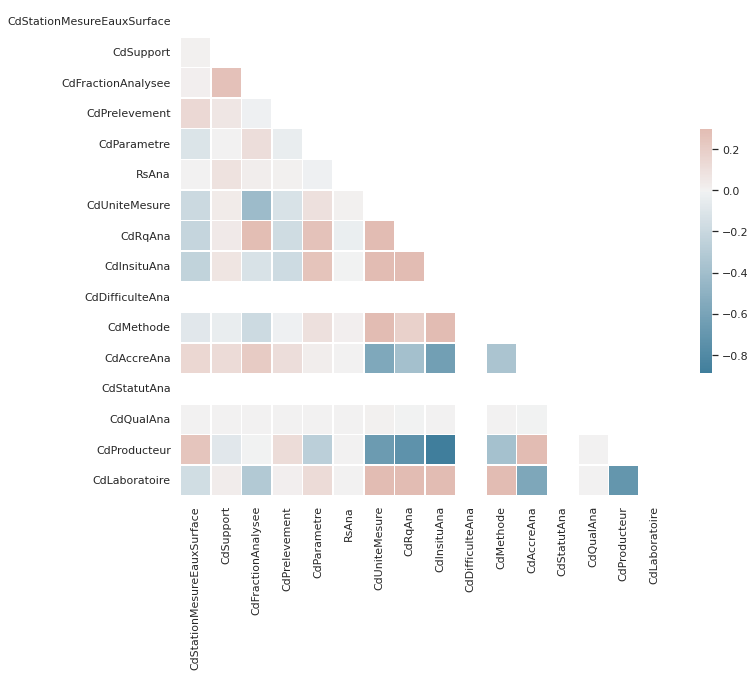

In [ ]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = analyse_dropna.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3.3 Peut-on éliminer certains ? Pourquoi ?

Oui on peut éliminer les paramètres fortemment corrélés car ils apportent la même information.

## 4 Simplification des données

Selon deux approches :

• synthèse annuelle des valeurs mesurées pour chaque paramètre sur chaque station : habituellement les thématiciens éliminent les valeurs les + hautes/basses et font une moyenne sur les valeurs restantes

• discrétisation de la séquence temporelle, en utilisant les quintiles (la grille seq-eau nécessite de regrouper les paramètres en altérations)

4.1 Première Approche :

In [ ]:
# Retirant d'abords les colonnes fortement correlées ie. valeur absolue de corrélation > 0.8
correlated_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.append(colname)

analyse_preprocess = analyse_dropna.drop(labels=correlated_features, axis=1, inplace=False)
print(f"Old : {len(analyse_dropna.columns)}, New :{len(analyse_preprocess.columns)}")

Old : 34, New :33


In [ ]:
# Convert Date String to Datetime Object
analyse_preprocess['DateAna'] = pd.to_datetime(analyse_preprocess['DateAna'])
analyse_preprocess['DatePrel'] = pd.to_datetime(analyse_preprocess['DatePrel'])

analyse_preprocess['DateAna'] = analyse_preprocess['DateAna'].apply(lambda x: int(x.year))
analyse_preprocess['DatePrel'] = analyse_preprocess['DatePrel'].apply(lambda x: int(x.year))

In [ ]:
analyse_preprocess['DateAna']
analyse_preprocess['DatePrel']

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
336433    2017
336434    2017
336435    2017
336436    2017
336437    2017
Name: DatePrel, Length: 323628, dtype: int64

In [ ]:
display(analyse_preprocess.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323628 entries, 0 to 336437
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CdStationMesureEauxSurface  323628 non-null  int64  
 1   LbStationMesureEauxSurface  323628 non-null  object 
 2   CdSupport                   323628 non-null  int64  
 3   LbSupport                   323628 non-null  object 
 4   CdFractionAnalysee          323628 non-null  int64  
 5   LbFractionAnalysee          323628 non-null  object 
 6   CdPrelevement               323628 non-null  int64  
 7   DatePrel                    323628 non-null  int64  
 8   HeurePrel                   323628 non-null  object 
 9   DateAna                     323628 non-null  int64  
 10  HeureAna                    323628 non-null  object 
 11  CdParametre                 323628 non-null  int64  
 12  LbLongParamètre             323628 non-null  object 
 13  RsAna         

None

In [ ]:
columns_groupby = ['CdSupport', 'CdParametre']

analyse_rsana = analyse_preprocess.groupby(columns_groupby).agg({'RsAna': lambda x: list(x), 'CdPrelevement': lambda x: list(x)}).reset_index()
#analyse_rsana['RsAna'] = analyse_rsana['RsAna'].apply(lambda x: x[0])

In [ ]:

def map_quantile(arr):
  s0 = np.quantile(arr, 0.2)
  s1 = np.quantile(arr, 0.4)
  s2 = np.quantile(arr, 0.6)
  s3 = np.quantile(arr, 0.8)
  for i, v in enumerate(arr):
    if v <= s0:
      arr[i] = 1
    elif v <= s1:
      arr[i] = 2
    elif v <= s2:
      arr[i] = 3
    elif v <= s3:
      arr[i] = 4
    else:
      arr[i] = 5
  return arr



analyse_rsana['RsAna'] = analyse_rsana['RsAna'].apply(lambda x: map_quantile(x))
analyse_rsana

,CdSupport,CdParametre,RsAna,CdPrelevement
0,3,1082,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4548257, 4548538, 6000393, 6000405, 6000587, ..."
1,3,1083,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4548257, 4548538, 6000393, 6000405, 6000587, ..."
2,3,1084,"[5, 5, 5, 5, 1, 1, 4, 1, 5, 5, 5, 1, 4, 1, 1, ...","[4548257, 4548538, 6000393, 6000405, 6000587, ..."
3,3,1092,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4548257, 4548538, 6000393, 6000405, 6000587, ..."
4,3,1093,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4548257, 4548538, 6000393, 6000405, 6000587, ..."
...,...,...,...,...
979,6,7129,"[1, 1, 1, 1, 1]","[6154855, 6154879, 6154903, 6154889, 6154885]"
980,6,7131,"[1, 1, 1, 1, 1]","[6154855, 6154879, 6154903, 6154889, 6154885]"
981,6,7153,"[2, 2, 1, 2, 2, 1, 4, 1, 1, 2, 2, 5, 1, 1, 2, ...","[6154855, 6154795, 6154891, 6154873, 6154807, ..."
982,6,7495,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[6154855, 6154891, 6154873, 6154843, 6154877, ..."


In [ ]:
dict_ = {'CdPrelevement' : analyse_rsana['CdPrelevement']}

for s in analyse_rsana['CdSupport']:
  for p in analyse_rsana['CdParametre']:
    for r in analyse_rsana['RsAana']:
      dict_[f'{p}-{s}'] = r
result = pd.Dataframe(dict_)
result

In [ ]:
vall= analyse_rsana['CdPrelevement'].values
np.hstack(vall)

array([4548257, 4548538, 6000393, ..., 6154905, 6154853, 6154885])

## 5 Classification

Effectuer une classification (clustering) pour extraire des groupes de stations similaires à partir

• des synthèses annuelles
• des séquences discrétisées.

Préciser les distances utilisées. Comparer les groupes obtenus.

rsna
code remarque